The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Figure saved in ../figs/ directory:
  - spatial_std_comparison.eps (for journal submission)
  - spatial_std_comparison.pdf (for LaTeX)
  - spatial_std_comparison.png (for preview)


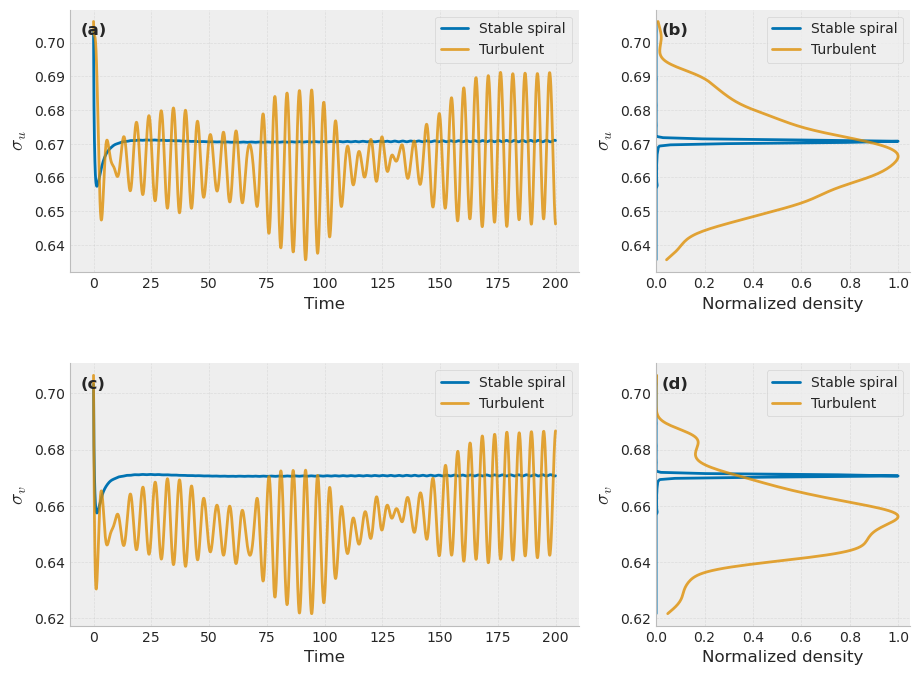

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde
import os

# Set style for publication
plt.style.use("bmh")

# Load data
df = pd.read_csv("../processed_data/spatial_std_comparison.csv")

# Define colors for high-impact journal
# Using colorblind-friendly palette
color_stable = '#0173B2'    # Strong blue
color_turbulent = '#DE8F05' # Orange

# Create figure with unequal subplots using GridSpec
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 1, 0.05], height_ratios=[1, 1],
                       wspace=0.3, hspace=0.35)

# (a) Top left: Time series of σ_u
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(df["time"], df["u_std_stable"], color=color_stable, 
         linewidth=2, label="Stable spiral")
ax1.plot(df["time"], df["u_std_turbulent"], color=color_turbulent, 
         linewidth=2, label="Turbulent", alpha=0.8)
ax1.set_xlabel("Time", fontsize=12)
ax1.set_ylabel(r"$\sigma_u$", fontsize=14)
ax1.legend(frameon=True, fontsize=10, loc='upper right')
ax1.text(0.02, 0.95, '(a)', transform=ax1.transAxes, fontsize=12, 
         fontweight='bold', va='top')
ax1.grid(True, alpha=0.3)

# (b) Top right: KDE of σ_u
ax2 = fig.add_subplot(gs[0, 1])

# Calculate KDEs
kde_stable_u = gaussian_kde(df["u_std_stable"].dropna())
kde_turbulent_u = gaussian_kde(df["u_std_turbulent"].dropna())

# Create evaluation points
u_min = min(df["u_std_stable"].min(), df["u_std_turbulent"].min())
u_max = max(df["u_std_stable"].max(), df["u_std_turbulent"].max())
u_eval = np.linspace(u_min, u_max, 200)

# Evaluate and normalize KDEs to [0, 1]
density_stable_u = kde_stable_u(u_eval)
density_turbulent_u = kde_turbulent_u(u_eval)

# Normalize to maximum density = 1
density_stable_u = density_stable_u / density_stable_u.max()
density_turbulent_u = density_turbulent_u / density_turbulent_u.max()

ax2.plot(density_stable_u, u_eval, color=color_stable, linewidth=2, 
         label="Stable spiral")
ax2.plot(density_turbulent_u, u_eval, color=color_turbulent, linewidth=2, 
         label="Turbulent", alpha=0.8)
ax2.set_xlabel("Normalized density", fontsize=12)
ax2.set_ylabel(r"$\sigma_u$", fontsize=14)
ax2.set_xlim(0, 1.05)
ax2.legend(frameon=True, fontsize=10)
ax2.text(0.02, 0.95, '(b)', transform=ax2.transAxes, fontsize=12, 
         fontweight='bold', va='top')
ax2.grid(True, alpha=0.3)

# (c) Bottom left: Time series of σ_v
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(df["time"], df["v_std_stable"], color=color_stable, 
         linewidth=2, label="Stable spiral")
ax3.plot(df["time"], df["v_std_turbulent"], color=color_turbulent, 
         linewidth=2, label="Turbulent", alpha=0.8)
ax3.set_xlabel("Time", fontsize=12)
ax3.set_ylabel(r"$\sigma_v$", fontsize=14)
ax3.legend(frameon=True, fontsize=10, loc='upper right')
ax3.text(0.02, 0.95, '(c)', transform=ax3.transAxes, fontsize=12, 
         fontweight='bold', va='top')
ax3.grid(True, alpha=0.3)

# (d) Bottom right: KDE of σ_v
ax4 = fig.add_subplot(gs[1, 1])

# Calculate KDEs for v
kde_stable_v = gaussian_kde(df["v_std_stable"].dropna())
kde_turbulent_v = gaussian_kde(df["v_std_turbulent"].dropna())

# Create evaluation points
v_min = min(df["v_std_stable"].min(), df["v_std_turbulent"].min())
v_max = max(df["v_std_stable"].max(), df["v_std_turbulent"].max())
v_eval = np.linspace(v_min, v_max, 200)

# Evaluate and normalize KDEs to [0, 1]
density_stable_v = kde_stable_v(v_eval)
density_turbulent_v = kde_turbulent_v(v_eval)

# Normalize to maximum density = 1
density_stable_v = density_stable_v / density_stable_v.max()
density_turbulent_v = density_turbulent_v / density_turbulent_v.max()

ax4.plot(density_stable_v, v_eval, color=color_stable, linewidth=2, 
         label="Stable spiral")
ax4.plot(density_turbulent_v, v_eval, color=color_turbulent, linewidth=2, 
         label="Turbulent", alpha=0.8)
ax4.set_xlabel("Normalized density", fontsize=12)
ax4.set_ylabel(r"$\sigma_v$", fontsize=14)
ax4.set_xlim(0, 1.05)
ax4.legend(frameon=True, fontsize=10)
ax4.text(0.02, 0.95, '(d)', transform=ax4.transAxes, fontsize=12, 
         fontweight='bold', va='top')
ax4.grid(True, alpha=0.3)

# Adjust tick parameters for all axes
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Create output directory if it doesn't exist
os.makedirs("../figs", exist_ok=True)

# Save figure in high quality EPS format
plt.savefig("../figs/spatial_std_comparison.eps", format='eps', dpi=300, 
            bbox_inches='tight')
plt.savefig("../figs/spatial_std_comparison.pdf", format='pdf', dpi=300, 
            bbox_inches='tight')
plt.savefig("../figs/spatial_std_comparison.png", format='png', dpi=300, 
            bbox_inches='tight')

print("Figure saved in ../figs/ directory:")
print("  - spatial_std_comparison.eps (for journal submission)")
print("  - spatial_std_comparison.pdf (for LaTeX)")
print("  - spatial_std_comparison.png (for preview)")

# Display the figure
plt.show()

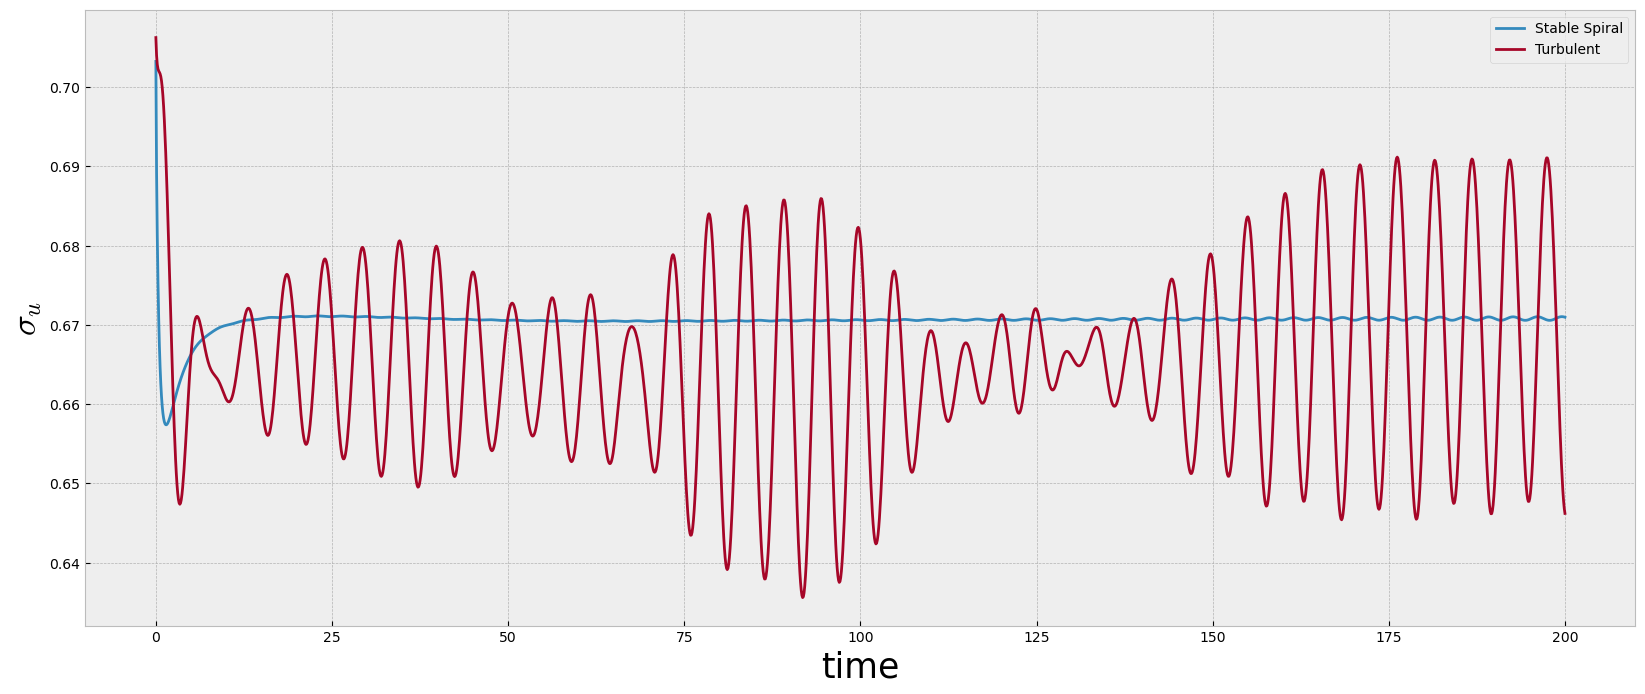

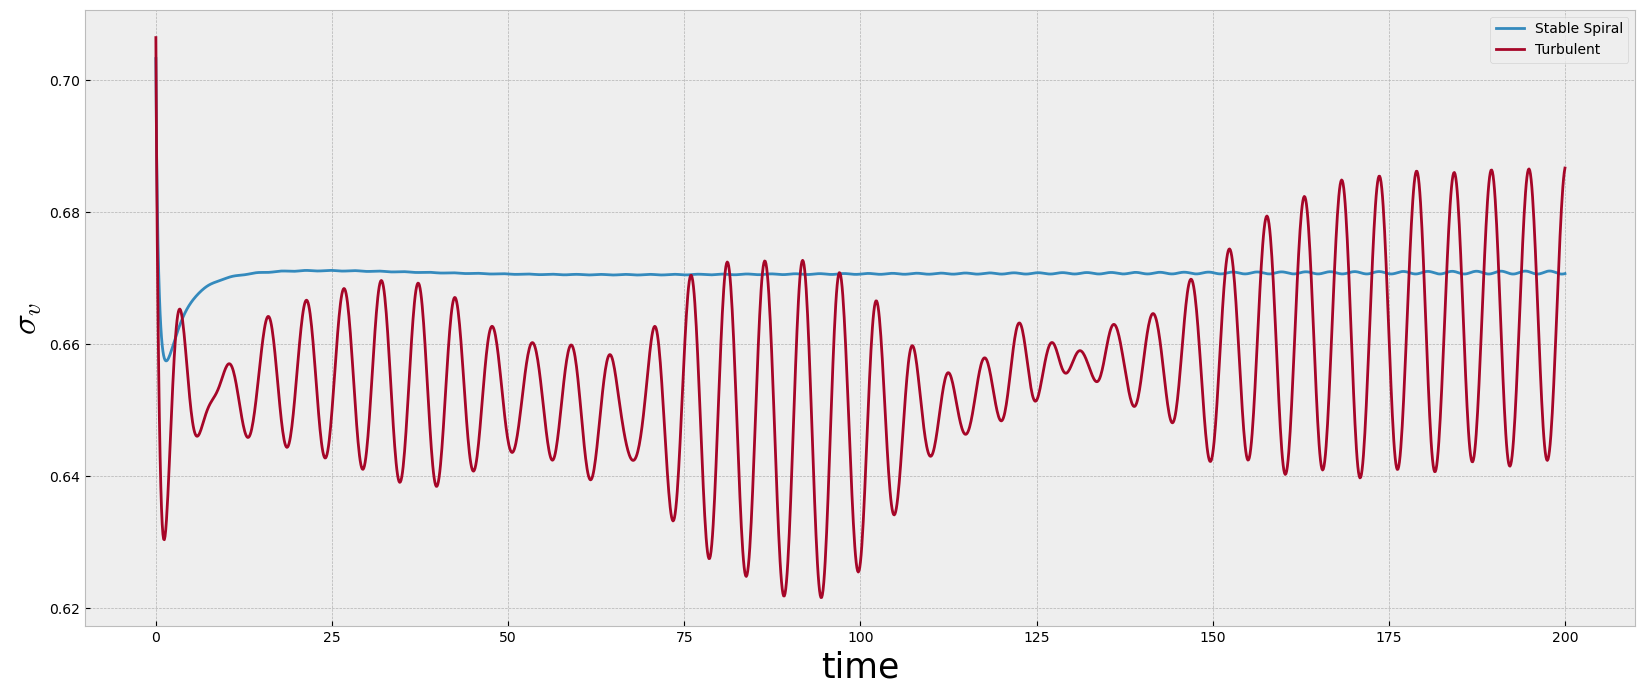

In [40]:
#!/usr/bin/env python
"""
extract_ts.py
=============================
Extract and combine spatial standard deviation statistics from rd-spiral experiments.

This script processes the output statistics from stable and turbulent spiral
reaction-diffusion simulations and creates a combined dataset for comparative
analysis. The data is filtered to a common time range for consistency.

Usage:
    python extract_ts.py

Output:
    - Combined CSV file with spatial standard deviations from both experiments
    - Summary statistics and verification output to console

Author: Sandy H. S. Herho <sandy.herho@email.ucr.edu>
Date: June 2025
"""

import pandas as pd
import numpy as np
import os
import sys
from pathlib import Path


def load_experiment_data(base_dir: str, experiment_names: list) -> dict:
    """
    Load statistics data from multiple experiments.
    
    Parameters
    ----------
    base_dir : str
        Base directory containing experiment outputs
    experiment_names : list
        List of experiment directory names
    
    Returns
    -------
    dict
        Dictionary mapping experiment names to their dataframes
    
    Raises
    ------
    FileNotFoundError
        If any experiment data file is missing
    """
    data = {}
    
    for exp_name in experiment_names:
        stats_path = os.path.join(base_dir, exp_name, "stats.csv")
        
        if not os.path.exists(stats_path):
            raise FileNotFoundError(
                f"Statistics file not found: {stats_path}\n"
                f"Please ensure the '{exp_name}' experiment has been run."
            )
        
        print(f"Loading {exp_name} data from: {stats_path}")
        data[exp_name] = pd.read_csv(stats_path)
        
    return data


def filter_by_time(data: dict, time_limit: float) -> dict:
    """
    Filter all experiment data to include only times up to the specified limit.
    
    Parameters
    ----------
    data : dict
        Dictionary of experiment dataframes
    time_limit : float
        Maximum time to include in the analysis
    
    Returns
    -------
    dict
        Dictionary of filtered dataframes with reset indices
    """
    filtered_data = {}
    
    print(f"\nFiltering data to time <= {time_limit}...")
    
    for exp_name, df in data.items():
        # Filter by time limit
        filtered_df = df[df['time'] <= time_limit].copy()
        
        # Reset index for clean processing
        filtered_df = filtered_df.reset_index(drop=True)
        
        filtered_data[exp_name] = filtered_df
        
        # Report filtering results
        original_count = len(df)
        filtered_count = len(filtered_df)
        print(f"  {exp_name}: {original_count} → {filtered_count} time points "
              f"(removed {original_count - filtered_count} points)")
    
    return filtered_data


def verify_time_consistency(data: dict) -> bool:
    """
    Verify that all experiments have consistent time points.
    
    Parameters
    ----------
    data : dict
        Dictionary of experiment dataframes
    
    Returns
    -------
    bool
        True if all experiments have identical time arrays
    """
    print("\nVerifying time consistency across experiments...")
    
    # Get reference time array from first experiment
    ref_name = list(data.keys())[0]
    ref_time = data[ref_name]['time'].values
    
    all_consistent = True
    
    for exp_name, df in data.items():
        t_start = df['time'].iloc[0]
        t_end = df['time'].iloc[-1]
        n_points = len(df)
        
        print(f"  {exp_name:15s}: {n_points:4d} points, "
              f"t ∈ [{t_start:6.2f}, {t_end:6.2f}]")
        
        # Check if time arrays match
        if exp_name != ref_name:
            if not np.allclose(df['time'].values, ref_time, rtol=1e-9):
                print(f"    ⚠️  Warning: Time points differ from {ref_name}")
                all_consistent = False
    
    if all_consistent:
        print("  ✓ All experiments have identical time points")
    else:
        print("  ⚠️  Time points are not perfectly aligned - using stable_spiral as reference")
    
    return all_consistent


def create_combined_dataframe(data: dict) -> pd.DataFrame:
    """
    Create a combined dataframe with spatial standard deviations from all experiments.
    
    Parameters
    ----------
    data : dict
        Dictionary of experiment dataframes
    
    Returns
    -------
    pd.DataFrame
        Combined dataframe with columns for each experiment's u_std and v_std
    """
    # Use stable_spiral time as reference (assuming it exists)
    if 'stable_spiral' not in data:
        raise ValueError("stable_spiral experiment data is required as time reference")
    
    # Initialize with time column
    combined_df = pd.DataFrame({
        'time': data['stable_spiral']['time']
    })
    
    # Add std columns from each experiment
    for exp_name, df in data.items():
        # Create descriptive column names
        u_col = f'u_std_{exp_name}'
        v_col = f'v_std_{exp_name}'
        
        # Add the data
        combined_df[u_col] = df['u_std']
        combined_df[v_col] = df['v_std']
    
    return combined_df


def save_results(combined_df: pd.DataFrame, output_dir: str) -> str:
    """
    Save the combined dataframe to CSV file.
    
    Parameters
    ----------
    combined_df : pd.DataFrame
        Combined experiment data
    output_dir : str
        Directory to save output file
    
    Returns
    -------
    str
        Path to saved file
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Define output file path
    output_file = os.path.join(output_dir, "stable_vs_turbulent_std_comparison.csv")
    
    # Save to CSV
    combined_df.to_csv(output_file, index=False)
    
    print(f"\n✓ Combined stable vs turbulent data saved to: {output_file}")
    
    return output_file


def print_summary(combined_df: pd.DataFrame):
    """
    Print summary statistics and sample data for verification.
    
    Parameters
    ----------
    combined_df : pd.DataFrame
        Combined experiment data
    """
    print(f"  Shape: {combined_df.shape}")
    print(f"  Columns: {', '.join(combined_df.columns)}")
    print(f"  Time range: {combined_df['time'].min():.2f} to {combined_df['time'].max():.2f}")
    
    # Display first few rows
    print("\nFirst 5 rows of combined data:")
    print(combined_df.head().to_string(float_format='%.6f'))
    
    # Display last few rows
    print("\nLast 5 rows of combined data:")
    print(combined_df.tail().to_string(float_format='%.6f'))
    
    # Summary statistics
    print("\nSummary of spatial standard deviations:")
    print(combined_df.describe().to_string(float_format='%.6f'))
    
    # Additional analysis: equilibrium behavior
    print("\nEquilibrium analysis (last 10% of data):")
    print("Comparing stable (dynamic equilibrium) vs turbulent (chaotic) behavior:")
    n_eq = max(int(0.1 * len(combined_df)), 5)
    
    for col in combined_df.columns:
        if col != 'time' and 'std' in col:
            mean_val = combined_df[col].iloc[-n_eq:].mean()
            std_val = combined_df[col].iloc[-n_eq:].std()
            # Stable spiral should have low std_val (steady rotation)
            # Turbulent spiral should have high std_val (chaotic dynamics)
            print(f"  {col:25s}: mean={mean_val:.6f}, std={std_val:.6f}")


def main():
    """
    Main function to extract and combine stable vs turbulent spiral results.
    """
    print("="*70)
    print("RD-SPIRAL EXPERIMENT DATA EXTRACTION")
    print("Extract spatial standard deviations from stable vs turbulent spirals")
    print("="*70)
    
    # Configuration
    base_dir = "../../rd_outputs"  # Adjust path as needed
    output_dir = "../processed_data"
    time_limit = 200.0  # Focus on t ≤ 200 for all experiments
    
    # Define experiments to process
    experiment_names = [
        "stable_spiral",
        "turbulent_spiral"
    ]
    
    try:
        # Step 1: Load all experiment data
        print("\nStep 1: Loading experiment data...")
        data = load_experiment_data(base_dir, experiment_names)
        
        # Step 2: Filter by time limit
        print("\nStep 2: Filtering by time limit...")
        filtered_data = filter_by_time(data, time_limit)
        
        # Step 3: Verify time consistency
        print("\nStep 3: Verifying time consistency...")
        verify_time_consistency(filtered_data)
        
        # Step 4: Create combined dataframe
        print("\nStep 4: Creating combined dataframe...")
        combined_df = create_combined_dataframe(filtered_data)
        
        # Step 5: Save results
        print("\nStep 5: Saving results...")
        output_file = save_results(combined_df, output_dir)
        
        # Step 6: Print summary
        print("\nStep 6: Summary and verification...")
        print_summary(combined_df)
        
        print("\n" + "="*70)
        print("✓ PROCESSING COMPLETE!")
        print(f"  Output saved to: {output_file}")
        print(f"  Data ready for stable vs turbulent dynamics comparison")
        print("="*70)
        
    except FileNotFoundError as e:
        print(f"\n❌ Error: {e}")
        print("\nPlease run the experiments first using:")
        for exp in experiment_names:
            print(f"  rd-spiral configs/{exp}.txt")
        sys.exit(1)
        
    except Exception as e:
        print(f"\n❌ Unexpected error: {e}")
        import traceback
        traceback.print_exc()
        sys.exit(1)


if __name__ == "__main__":
    # Run the main function only if script is executed directly
    main()

RD-SPIRAL EXPERIMENT DATA EXTRACTION
Extract spatial standard deviations from stable vs turbulent spirals

Step 1: Loading experiment data...
Loading stable_spiral data from: ../../rd_outputs/stable_spiral/stats.csv
Loading turbulent_spiral data from: ../../rd_outputs/turbulent_spiral/stats.csv

Step 2: Filtering by time limit...

Filtering data to time <= 200.0...
  stable_spiral: 2001 → 2001 time points (removed 0 points)
  turbulent_spiral: 5001 → 2001 time points (removed 3000 points)

Step 3: Verifying time consistency...

Verifying time consistency across experiments...
  stable_spiral  : 2001 points, t ∈ [  0.00, 200.00]
  turbulent_spiral: 2001 points, t ∈ [  0.00, 200.00]
  ✓ All experiments have identical time points

Step 4: Creating combined dataframe...

Step 5: Saving results...

✓ Combined stable vs turbulent data saved to: ../processed_data/stable_vs_turbulent_std_comparison.csv

Step 6: Summary and verification...
  Shape: (2001, 5)
  Columns: time, u_std_stable_spiral